In [76]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.metrics import accuracy_score

In [53]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [54]:
df.month.value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [55]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Preprocessing

In [57]:
# no missing values 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [58]:
df.duplicated().sum()

0

In [59]:
df.job.value_counts().index

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'unknown'],
      dtype='object')

In [60]:
df1 = df[df['deposit'] == 'yes']
df2 = df[df['deposit'] == 'no']

In [61]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


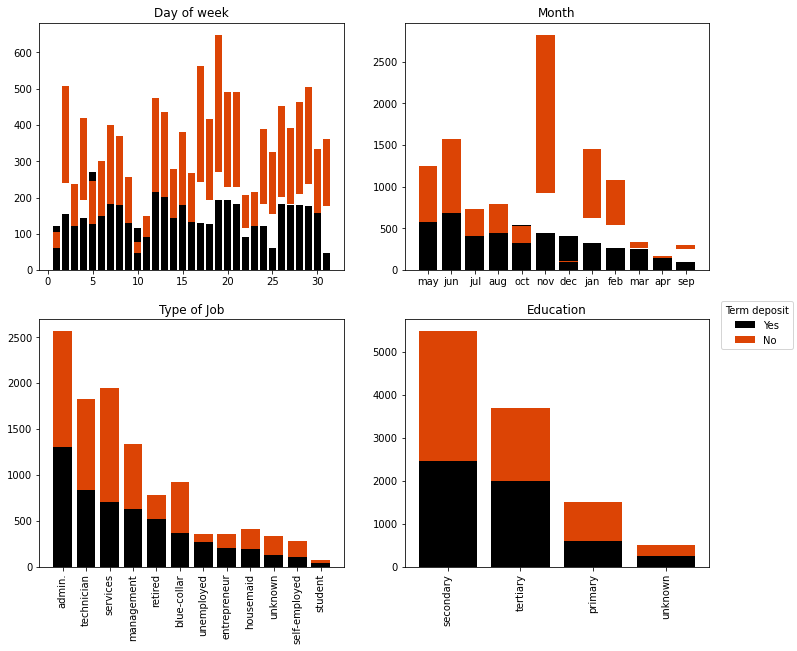

In [62]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(df1['day'].unique(),height = df1['day'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(df2['day'].unique(),height = df2['day'].value_counts(),bottom = df1['day'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Day of week')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(df1['month'].unique(),height = df1['month'].value_counts(),color='#000000')
ax[0, 1].bar(df2['month'].unique(),height = df2['month'].value_counts(),bottom = df1['month'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Month')
ax[1, 0].bar(df1['job'].unique(),height = df1['job'].value_counts(),color='#000000')
ax[1, 0].bar(df1['job'].unique(),height = df2['job'].value_counts()[df1['job'].value_counts().index],bottom = df1['job'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)
ax[1, 1].bar(df1['education'].unique(),height = df1['education'].value_counts(),color='#000000') #row=0, col=1
ax[1, 1].bar(df1['education'].unique(),height = df2['education'].value_counts()[df1['education'].value_counts().index],bottom = df1['education'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

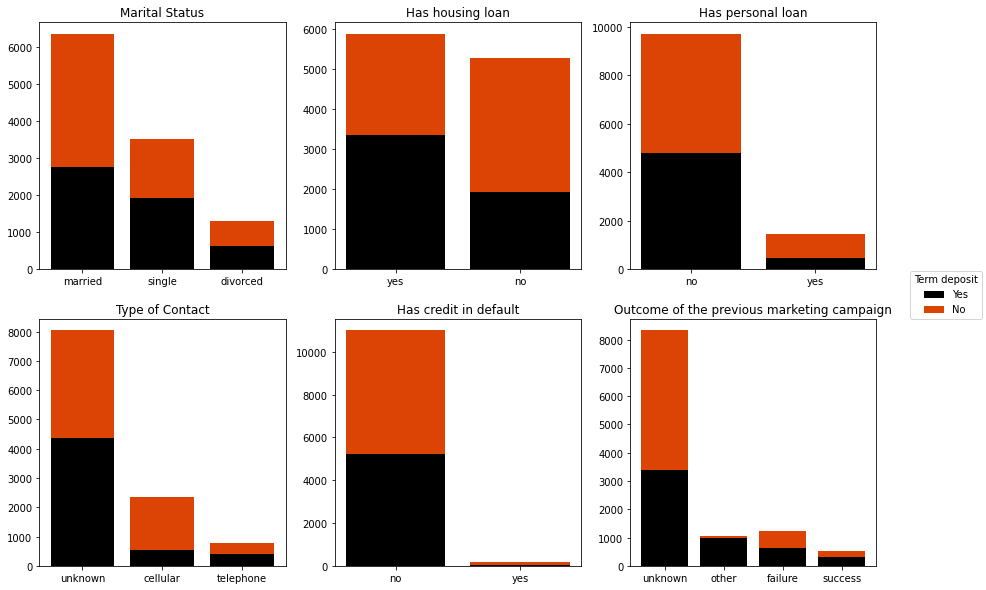

In [63]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

b1 = ax[0, 0].bar(df1['marital'].unique(),height = df1['marital'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(df1['marital'].unique(),height = df2['marital'].value_counts()[df1['marital'].value_counts().index],bottom = df1['marital'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Marital Status')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(df1['housing'].unique(),height = df1['housing'].value_counts(),color='#000000')
ax[0, 1].bar(df1['housing'].unique(),height = df2['housing'].value_counts()[df1['housing'].value_counts().index],bottom = df1['housing'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Has housing loan')
ax[0, 2].bar(df1['loan'].unique(),height = df1['loan'].value_counts(),color='#000000')
ax[0, 2].bar(df1['loan'].unique(),height = df2['loan'].value_counts()[df1['loan'].value_counts().index],bottom = df1['loan'].value_counts(),color = '#DC4405') 
ax[0, 2].title.set_text('Has personal loan')
ax[1, 0].bar(df1['contact'].unique(),height = df1['contact'].value_counts(),color='#000000')
ax[1, 0].bar(df1['contact'].unique(),height = df2['contact'].value_counts()[df1['contact'].value_counts().index],bottom = df1['contact'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Contact')
ax[1, 1].bar(df1['default'].unique(),height = df1['default'].value_counts(),color='#000000')
ax[1, 1].bar(df1['default'].unique(),height = df2['default'].value_counts()[df1['default'].value_counts().index],bottom = df1['default'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Has credit in default')
ax[1, 2].bar(df1['poutcome'].unique(),height = df1['poutcome'].value_counts(),color='#000000')
ax[1, 2].bar(df1['poutcome'].unique(),height = df2['poutcome'].value_counts()[df1['poutcome'].value_counts().index],bottom = df1['poutcome'].value_counts(),color = '#DC4405') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

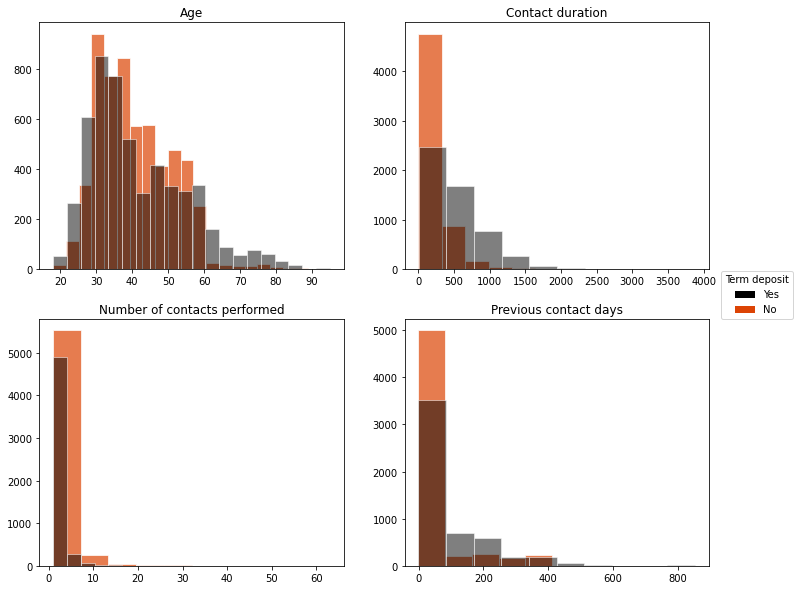

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].hist(df2['age'],color = '#DC4405',alpha=0.7,bins=20, edgecolor='white') 
ax[0, 0].hist(df1['age'],color='#000000',alpha=0.5,bins=20, edgecolor='white')
ax[0, 0].title.set_text('Age')
ax[0, 1].hist(df2['duration'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(df1['duration'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Contact duration')
ax[1, 0].hist(df2['campaign'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(df1['campaign'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Number of contacts performed')
ax[1, 1].hist(df2[df2['pdays'] != 999]['pdays'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(df1[df1['pdays'] != 999]['pdays'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Previous contact days')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

In [65]:
predictors = df.iloc[:,0:20]

In [66]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## Label encoding

In [67]:
labelencoder = LabelEncoder()
df["job"] = labelencoder.fit_transform(df["job"])
labelencoder = LabelEncoder()
df["marital"] = labelencoder.fit_transform(df["marital"])
labelencoder = LabelEncoder()
df["education"] = labelencoder.fit_transform(df["education"])
labelencoder = LabelEncoder()
df["default"] = labelencoder.fit_transform(df["default"])
labelencoder = LabelEncoder()
df["poutcome"] = labelencoder.fit_transform(df["poutcome"])
labelencoder = LabelEncoder()
df["contact"] = labelencoder.fit_transform(df["contact"])
labelencoder = LabelEncoder()
df["month"] = labelencoder.fit_transform(df["month"])
labelencoder = LabelEncoder()
df["poutcome"] = labelencoder.fit_transform(df["poutcome"])
labelencoder = LabelEncoder()
df["housing"] = labelencoder.fit_transform(df["housing"])
labelencoder = LabelEncoder()
df["deposit"] = labelencoder.fit_transform(df["deposit"])
labelencoder = LabelEncoder()
labelencoder = LabelEncoder()
df["loan"] = labelencoder.fit_transform(df["loan"])
labelencoder = LabelEncoder()

In [68]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [88]:
X = df.drop(columns=["deposit"],axis=1)
y = df[["deposit"]]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [77]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
perp_model = lm.Perceptron().fit(X_train_std,y_train)
y_pred = perp_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.61


In [83]:
X_train.shape

(7813, 16)

In [103]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim= 16 ))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs= 50 , batch_size=10, validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 1s 2ms/step - loss: 12.0957 - accuracy: 0.6347 - val_loss: 0.8343 - val_accuracy: 0.6852
Epoch 2/50
625/625 [==============================] - 1s 2ms/step - loss: 1.4815 - accuracy: 0.6955 - val_loss: 1.6914 - val_accuracy: 0.6494
Epoch 3/50
625/625 [==============================] - 1s 2ms/step - loss: 0.7815 - accuracy: 0.7418 - val_loss: 0.5625 - val_accuracy: 0.7633
Epoch 4/50
625/625 [==============================] - 1s 2ms/step - loss: 0.6102 - accuracy: 0.7542 - val_loss: 0.6257 - val_accuracy: 0.6820
Epoch 5/50
625/625 [==============================] - 1s 2ms/step - loss: 0.5384 - accuracy: 0.7598 - val_loss: 0.5260 - val_accuracy: 0.7492
Epoch 6/50
625/625 [==============================] - 1s 2ms/step - loss: 0.5272 - accuracy: 0.7651 - val_loss: 0.5228 - val_accuracy: 0.7614
Epoch 7/50
625/625 [==============================] - 1s 2ms/step - loss: 0.5197 - accuracy: 0.7622 - val_loss: 0.5231 - val_accuracy: 0.7486
Epoch

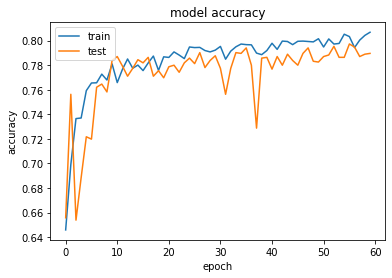

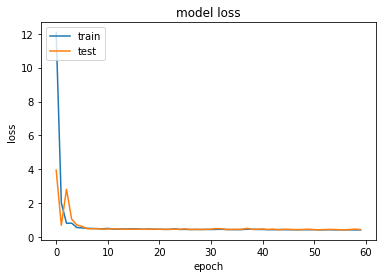

In [100]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')k
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()